<a href="https://colab.research.google.com/github/PKvasnick/RTutorial/blob/master/code/R02_Zaklady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Základy R

... čo bude trocha nudná, ale nutná časť. Žiadna štatistika, ale dátové typy, príkazy, definície.

In [1]:
x <- 5.5
x
class(x)
6.5 -> y # To sice vyzera sexy, ale je to len ozdoba.
y

[1] 5.5

[1] "numeric"

[1] 6.5

### Priradenie <-

V R existujú viaceré znaky priradenia. Funguje *=*, *->*, ale aj *<-*, a špeciálny význam majú *<<-* a *->>* (Nechcete vedieť, čo robia). 

*=* slúži na mapovanie parametrov a v príkaze *case*, takže je slušné pre priradenie používať *<-*, hoci pre ľudí, ktorí programujú aj v inom jazyku, je ťažké občas nenapísať *=*. Vopred sa ospravedlňujem.

### Číselné typy

*numeric* je generické číslo v R. Ale máme aj ďalšie typy:

In [2]:
y <- 5
class(y)
y <- as.integer(5)
class(y)
is.integer(y)

[1] "numeric"

[1] "integer"

[1] TRUE

Celé číslo musíme ako také definovať. 

### Reťazce


In [3]:
s <- "Peter"
s == 'Peter'
class(s)
substring(s, first=2, last=3)
s <- sub("ete", "avo", s)
s
substring(s, 1:3, 3:5)
sprintf("%s má %d rokov.", "Peter", 54)

[1] TRUE

[1] "character"

[1] "et"

[1] "Pavor"

[1] "Pav" "avo" "vor"

[1] "Peter má 54 rokov."

substring je *vektorizovaná* funkcia - pre vektorový argument vráti vektor.


In [4]:
1:5
sqrt(1:5)
vec <- c(1,2,3,4,5,6) # toto je komentar o tom, ze c() vytvara vektor
vec
sin(vec)

[1] 1 2 3 4 5

[1] 1.000000 1.414214 1.732051 2.000000 2.236068

[1] 1 2 3 4 5 6

[1]  0.8414710  0.9092974  0.1411200 -0.7568025 -0.9589243 -0.2794155

Apropos, máme \[\pi\]?


In [6]:
apropos("pi")

[1] "cospi"        "grouping"     "pi"           "pico"         "pictex"      
 [6] "pie"          "pipe"         "shapiro.test" "sinpi"        "spineplot"   
[11] "stopifnot"    "Sys.getpid"   "tanpi"

Aha - asi máme.

In [7]:
help("pi")
cos(pi)

[1] -1

Kuk doprava.

### Logické hodnoty

In [8]:
class(TRUE)
c(T,T,F,F) == c(T,F,T,F)
c(T,T,F,F) & c(T,F,T,F)
c(T,T,F,F) | c(T,F,T,F)

[1] "logical"

[1]  TRUE FALSE FALSE  TRUE

[1]  TRUE FALSE FALSE FALSE

[1]  TRUE  TRUE  TRUE FALSE

### Vektory

In [9]:
1:3 == c(1,2,3)
help(seq)
vec1 <- seq(from = 1, to = 10, by = 3)
vec1
vec2 <- seq(from = 1, by = 2, length.out = 5)
vec2
vec3 <- seq(from = 1, to = 10, length.out = 4)
vec3
vec4 <- seq(from = 0, by = 1, along.with = vec3)
vec4
all.equal(vec1, vec3)
ifelse(vec1>5,"Yes", "No")

[1] TRUE TRUE TRUE

[1]  1  4  7 10

[1] 1 3 5 7 9

[1]  1  4  7 10

[1] 0 1 2 3

[1] TRUE

[1] "No"  "No"  "Yes" "Yes"

Dvojbodka nám umožňuje pohodlne vytvárať číselné rady. 

### Zoznam (list) 

je vektor s pomenovanými prvkami. 


In [11]:
vec <- 1:4
names(vec) <- c("jeden", "dva", "tri", "štyri")
vec

jeden   dva   tri štyri 
    1     2     3     4

### Data frame
* Logicky vzniká spojením zoznamov s rovnakými menami položiek. 
* Fyzicky to je skôr zoznam vektorov.

In [12]:
x <- data.frame(
  v1 = c(1,2,3,4),
  v2 = as.integer(c(0,0,1,1)),
  v3 = c("a","b","a","b")
)
x
x$v1 # stlpec
x$v2[2] # element
x[2,"v1"] # element
x[2,] # riadok
x$v3 
is.factor(x$v3)
nrow(x) # pocet riadkov
ncol(x) # pocet stlpcov

v1,v2,v3
<dbl>,<int>,<chr>
1,0,a
2,0,b
3,1,a
4,1,b


[1] 1 2 3 4

[1] 0

[1] 2

,v1,v2,v3
,<dbl>,<int>,<chr>
2,2,0,b


[1] "a" "b" "a" "b"

[1] FALSE

[1] 4

[1] 3

### Príkazy R

In [13]:
for(i in 1:10) {
  if (i %% 2 == 0) {
    print(i)
  } else {
    print(paste(i, "je", "neparne"))
  }
}

[1] "1 je neparne"
[1] 2
[1] "3 je neparne"
[1] 4
[1] "5 je neparne"
[1] 6
[1] "7 je neparne"
[1] 8
[1] "9 je neparne"
[1] 10


### Funkcie

In [14]:
factorial <- function(n)
{
  if (n==0 | n==1)
    { return(1); }
  else 
    { return(n * factorial(n-1)); }
}

factorial(10)

[1] 3628800

__return__ je funkcia!

Použitie funkcie na vektor:

* Ak je vnútro funkcie vektorizované, potom môžeme funkciu aplikovať na číslo i na vektor.

In [20]:
kvadrat <- function(x)
  return(x**2)

kvadrat(1:5)

[1]  1  4  9 16 25

* Ak vnútro funkcie nie je vektorizované (ako v nasledujúcom príklade funkcie min a max, musíme aplikovať funkciu na jednotlivé prvky vektora. 

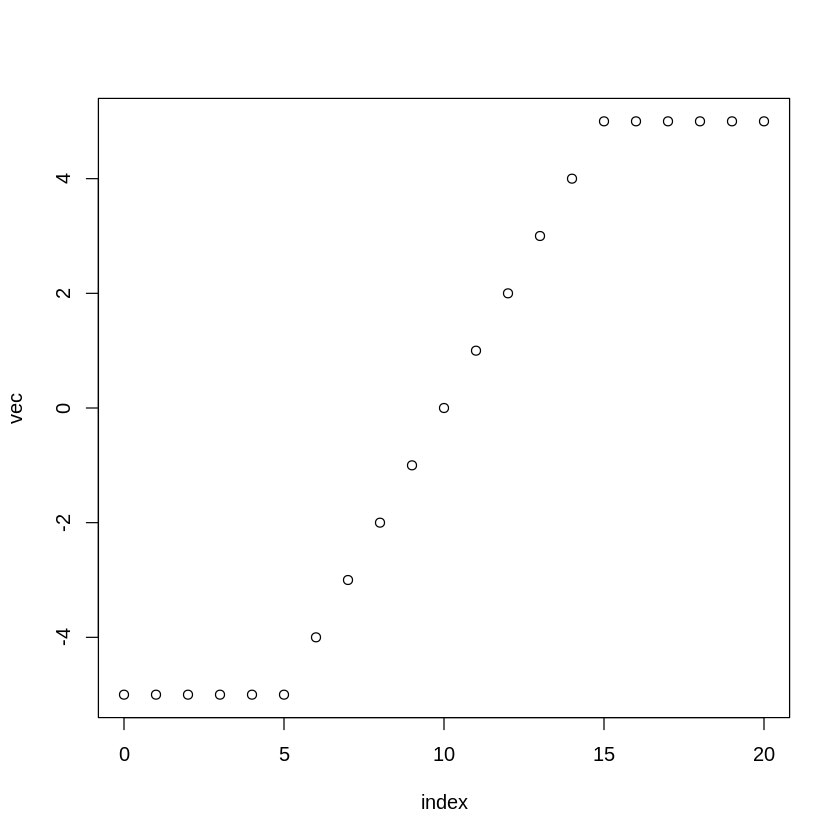

In [21]:
my_clip <- function(x, a, b) # orezavacia funkcia
{
  return(min(b, max(a,x)))
}

vec = seq(from = -10, to = 10, by = 1)
vec <- sapply(vec, my_clip, a = -5, b = 5); # potrebne argumenty pre funkciu napiseme za nu...
vecx <- seq(from = 0, by = 1, along.with = vec)
plot(vecx, vec, xlab = "index")

... nech máme aspoň nejaký graf v tomto nudnom notebooku.
